In [4]:
# Imports
import pandas as pd
import seaborn as sbn
import statistics as sts

In [5]:
# Importar base de tempo
df = pd.read_csv('../Dados/tempo.csv', sep=';')

In [6]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [7]:
df.tail()

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim
12,nublado,81,75.0,FALSO,sim
13,chuva,71,91.0,VERDADEIRO,nao


In [8]:
df.shape

(14, 5)

In [9]:
# nomes das colunas
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

In [10]:
gp =df.groupby(['Aparencia']).size()
gp

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

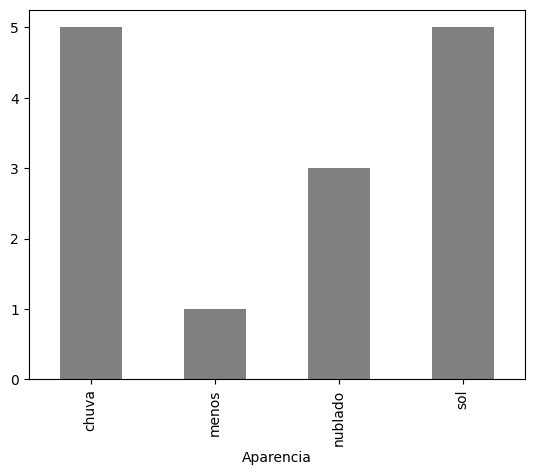

In [11]:
gp.plot.bar(color='gray')

In [12]:
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [13]:
gp = df.groupby(['Temperatura']).size()
gp

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<Axes: xlabel='Temperatura'>

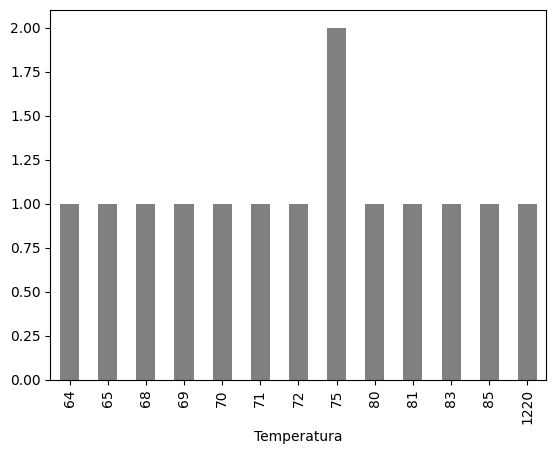

In [14]:
gp.plot.bar(color='gray')

In [15]:
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [16]:
gp = df.groupby(['Umidade']).size()
gp

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [17]:
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [18]:
gp = df.groupby(['Jogar']).size()
gp

Jogar
nao    5
sim    9
dtype: int64

Text(0.5, 1.0, 'Umidade')

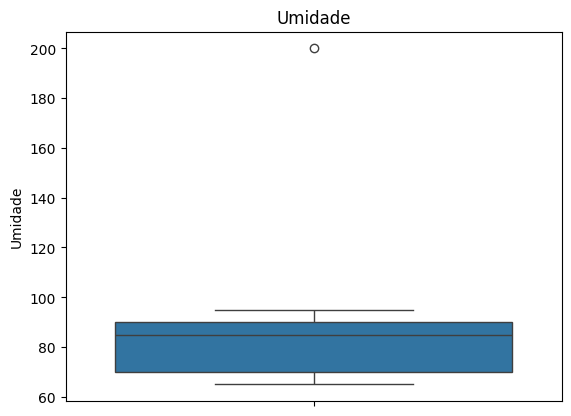

In [19]:
sbn.boxplot(df['Umidade']).set_title('Umidade')

In [20]:
# Realizar a limpeza de NAN
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [21]:
# Remover NAN e substituir por mediana, vamos verificar os dados antes
df['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

In [23]:
# Para Vento temos que padronizar e normalizar o NAN
gp = df.groupby(['Vento']).size()
gp

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [24]:
# preencher NAN com Masculino (moda)
df['Vento'].fillna('FALSO', inplace=True)

In [27]:
# Verificar novamente NAN
df['Vento'].isnull().sum()

np.int64(0)

In [37]:
df['Vento'].describe()

count        14
unique        2
top       FALSO
freq          8
Name: Vento, dtype: object

In [29]:
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [30]:
# Calculaar a Mediana
mediana = sts.median(df['Umidade'])
mediana

85.5

In [31]:
# Substituir
df.loc[(df['Umidade'] > 100), 'Umidade'] = mediana

In [47]:
df['Umidade'].isnull().sum()

np.int64(0)

In [44]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [45]:
df.tail()

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,85.5,FALSO,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim
12,nublado,81,75.0,FALSO,sim
13,chuva,71,91.0,VERDADEIRO,nao


In [46]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64